In [1]:
import os
import numpy as np

x_train = []
y_train = []

x_test = []
y_test = []

PATH = '/content/drive/My Drive/Test/'

for i in range(2, 7):
    for j in range(1, 17):
        f = open(PATH + str(i) + '/' + str(j) + '.csv', 'r')
        line = f.readline()
        while True:
            line = f.readline()
            if not line: break
            arr = line.split(',')
            x_train.append(arr[1:7])
            y_train.append(i - 2)

    for j in range(16, 21):
        f = open(PATH + str(i) + '/' + str(j) + '.csv', 'r')
        line = f.readline()
        while True:
            line = f.readline()
            if not line: break
            arr = line.split(',')
            x_test.append(arr[1:7])
            y_test.append(i - 2)


x_train = np.array(x_train).astype(np.float)
y_train = np.array(y_train).astype(np.int)
print(x_train)
print(y_train)
print(x_train.shape, y_train.shape)

x_test = np.array(x_test).astype(np.float)
y_test = np.array(y_test).astype(np.int)
print(x_test)
print(y_test)
print(x_test.shape, y_test.shape)

[[ 0.0e+00  0.0e+00  9.0e-06 -4.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  1.1e-05 -4.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00 -1.0e-06  1.0e-05 -4.0e+00  0.0e+00  0.0e+00]
 ...
 [ 0.0e+00  5.0e-06 -4.4e-05  6.0e+00  1.2e+01  0.0e+00]
 [ 0.0e+00  6.0e-06 -5.1e-05  6.0e+00  1.2e+01  0.0e+00]
 [ 0.0e+00 -5.0e-06 -4.5e-05  6.0e+00  1.2e+01  0.0e+00]]
[0 0 0 ... 4 4 4]
(5172990, 6) (5172990,)
[[-0.0000e+00 -0.0000e+00 -8.0000e-06  6.0000e+00  0.0000e+00  0.0000e+00]
 [-0.0000e+00 -1.0000e-06 -8.0000e-06  6.0000e+00  0.0000e+00  0.0000e+00]
 [-0.0000e+00 -1.0000e-06 -8.0000e-06  6.0000e+00  0.0000e+00  0.0000e+00]
 ...
 [ 0.0000e+00 -9.0000e-06 -1.3018e-02 -1.0000e+00  0.0000e+00  4.4000e+01]
 [-0.0000e+00  1.9000e-05  3.3339e-02 -1.0000e+00  0.0000e+00  4.4000e+01]
 [-0.0000e+00  2.0000e-06  3.2410e-03 -1.0000e+00  0.0000e+00  4.4000e+01]]
[0 0 0 ... 4 4 4]
(1566406, 6) (1566406,)


In [2]:
norm = x_train.max(axis=0)
print(norm)
print('')

x_train = x_train / norm
x_test = x_test / norm


print(x_train)
print(y_train)
print('')

print(x_train.min(axis=0))
print(x_train.max(axis=0))
print('')
print(x_test.min(axis=0))
print(x_test.max(axis=0))
print('')

[193.        74.684303 190.111313 450.       100.       100.      ]

[[ 0.00000000e+00  0.00000000e+00  4.73406861e-08 -8.88888889e-03
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  5.78608386e-08 -8.88888889e-03
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.33896945e-08  5.26007624e-08 -8.88888889e-03
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  6.69484724e-08 -2.31443354e-07  1.33333333e-02
   1.20000000e-01  0.00000000e+00]
 [ 0.00000000e+00  8.03381669e-08 -2.68263888e-07  1.33333333e-02
   1.20000000e-01  0.00000000e+00]
 [ 0.00000000e+00 -6.69484724e-08 -2.36703431e-07  1.33333333e-02
   1.20000000e-01  0.00000000e+00]]
[0 0 0 ... 4 4 4]

[-0.19689119 -1.74698165 -0.1979794  -1.          0.          0.        ]
[1. 1. 1. 1. 1. 1.]

[-0.18134715 -0.47411549 -0.06487954 -1.          0.          0.        ]
[0.75129534 0.35221543 0.85588735 1.         1.         1.        ]



In [3]:
FRAME = 1800
STRIDE = 90

x_train_seg = []
y_train_seg = []
for i in range(FRAME, x_train.shape[0] + 1, STRIDE):    
    x_train_seg.append(x_train[i-FRAME:i, :])
    y_train_seg.append(y_train[i - 1])

x_train_seg = np.array(x_train_seg)
x_train_seg = x_train_seg[:, :, :, np.newaxis]
y_train_seg = np.array(y_train_seg)

print(x_train_seg.shape, y_train_seg.shape, np.bincount(y_train_seg))

x_test_seg = []
y_test_seg = []
for i in range(FRAME, x_test.shape[0] + 1, STRIDE):    
    x_test_seg.append(x_test[i-FRAME:i, :])
    y_test_seg.append(y_test[i - 1])

x_test_seg = np.array(x_test_seg)
x_test_seg = x_test_seg[:, :, :, np.newaxis]
y_test_seg = np.array(y_test_seg)

print(x_test_seg.shape, y_test_seg.shape, np.bincount(y_test_seg))

(57458, 1800, 6, 1) (57458,) [12656 11125 10505 12668 10504]
(17385, 1800, 6, 1) (17385,) [3812 3459 3098 3665 3351]


In [4]:
ran_idx = np.random.choice(x_train_seg.shape[0], x_train_seg.shape[0])
x_train_seg = x_train_seg[ran_idx]
y_train_seg = y_train_seg[ran_idx]

ran_idx = np.random.choice(x_test_seg.shape[0], x_test_seg.shape[0])
x_test_seg = x_test_seg[ran_idx]
y_test_seg = y_test_seg[ran_idx]

In [5]:
print(x_train_seg.shape, y_train_seg.shape, np.bincount(y_train_seg))
print(x_test_seg.shape, y_test_seg.shape, np.bincount(y_test_seg))

(57458, 1800, 6, 1) (57458,) [12520 11130 10618 12669 10521]
(17385, 1800, 6, 1) (17385,) [3805 3481 2996 3670 3433]


In [6]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, 3, padding='same', activation='relu', input_shape=(1800, 6, 1)),
    tf.keras.layers.Conv2D(16, 3, (2, 1), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(32, 3, (2, 1), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, (2, 1), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(128, 3, (2, 1), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, 3, (2, 1), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(512, 3, (2, 1), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(512, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(1024, 3, (2, 1), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(1024, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(2048, 3, (2, 1), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(2048, 3, padding='same', activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(5)
])

model.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.1),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1800, 6, 8)        80        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 900, 6, 16)        1168      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 900, 6, 16)        2320      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 450, 6, 32)        4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 450, 6, 32)        9248      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 225, 6, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 225, 6, 64)        3

In [7]:
history = model.fit(x_train_seg, y_train_seg, batch_size=64, epochs=10, validation_data=(x_test_seg, y_test_seg))

Epoch 1/10
898/898 [==============================] - 281s 313ms/step - loss: 1.5450 - accuracy: 0.2810 - val_loss: 1.7441 - val_accuracy: 0.2887
Epoch 2/10
898/898 [==============================] - 279s 310ms/step - loss: 1.1014 - accuracy: 0.5573 - val_loss: 1.0247 - val_accuracy: 0.5894
Epoch 3/10
898/898 [==============================] - 278s 310ms/step - loss: 0.8128 - accuracy: 0.6796 - val_loss: 0.7360 - val_accuracy: 0.7176
Epoch 4/10
898/898 [==============================] - 278s 310ms/step - loss: 0.6357 - accuracy: 0.7499 - val_loss: 0.8205 - val_accuracy: 0.6744
Epoch 5/10
898/898 [==============================] - 278s 310ms/step - loss: 0.4982 - accuracy: 0.8043 - val_loss: 0.7135 - val_accuracy: 0.7394
Epoch 6/10
898/898 [==============================] - 278s 310ms/step - loss: 0.3690 - accuracy: 0.8591 - val_loss: 0.9029 - val_accuracy: 0.7451
Epoch 7/10
898/898 [==============================] - 278s 309ms/step - loss: 0.2512 - accuracy: 0.9064 - val_loss: 0.8655 -

In [8]:
import matplotlib.pyplot as plt
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
def plot_metrics(history):
  metrics =  ['loss', 'accuracy']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()


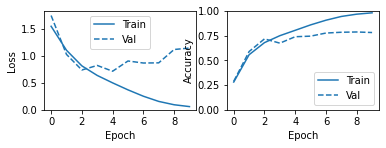

In [9]:
plot_metrics(history)

In [10]:
pred = model.predict(x_test_seg)

print(pred)

[[ 17.544973    -7.330028   -12.250488    -7.8576      -6.2434    ]
 [ -7.853811    16.212633    -1.5875752  -21.856556    -1.1833098 ]
 [-13.645011    -0.10606226   0.09792493  -3.3108845    7.493363  ]
 ...
 [ 14.987167    -0.05238945 -13.075558    -7.896595    -7.9584084 ]
 [-11.812963   -10.0419855  -15.374234    16.923182     1.9931209 ]
 [-12.097933    -2.3458185  -17.900482    15.572793     0.45735168]]


In [11]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test_seg, pred.argmax(axis=1))
print(matrix)
print(np.bincount(y_test_seg)[:, np.newaxis])
print((matrix / np.bincount(y_test_seg)[:, np.newaxis] * 100).astype(np.int))

[[3646   60   74   19    6]
 [ 135 2296  467   81  502]
 [  93  442 2179    6  276]
 [   6   85   50 3208  321]
 [  36  377  618  139 2263]]
[[3805]
 [3481]
 [2996]
 [3670]
 [3433]]
[[95  1  1  0  0]
 [ 3 65 13  2 14]
 [ 3 14 72  0  9]
 [ 0  2  1 87  8]
 [ 1 10 18  4 65]]
